In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse
import datetime

In [29]:
# Ouverture fichier tickets
tickets = pd.read_csv('data/TicketsHistory.csv')


C:\Users\EASY\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
tickets.head()


,Unnamed: 0,company,departure_ts,arrival_ts,price_in_cents,search_ts,o_city_name,o_city_latitude,o_city_longitude,d_city_name,...,d_station_name,d_station_latitude,d_station_longitude,travel_duration,classe_time,distance (km),classe_distance,has_adjustable_seats,has_wifi,transport_type
0,0,8385,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,orleans,47.907018,1.90627,montpellier,...,NaN,NaN,NaN,0 days 06:10:00,short,503.197862,medium,False,False,carpooling
1,1,9,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,orleans,47.907018,1.90627,montpellier,...,Station Les Sabines,43.583932,3.860233,0 days 17:50:00,too_long,503.197862,medium,True,True,bus
2,2,8377,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,orleans,47.907018,1.90627,montpellier,...,Montpellier,43.604900,3.880500,1 days 07:57:00,too_long,503.197862,medium,True,False,train
3,3,8377,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,orleans,47.907018,1.90627,montpellier,...,Montpellier,43.604900,3.880500,0 days 21:35:00,too_long,503.197862,medium,True,False,train
4,4,8381,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,orleans,47.907018,1.90627,montpellier,...,Montpellier,43.604900,3.880500,0 days 21:46:00,too_long,503.197862,medium,True,False,train


In [4]:
tickets.shape


(74168, 25)

#Question :  durée min/max/moyenne par trajet

In [5]:
tickets['travel_duration'].describe() 

count               74168
unique               1819
top       0 days 02:30:00
freq                 2795
Name: travel_duration, dtype: object

#Question prix min, moyen et max par trajet

In [6]:
tickets['price_in_cents'].describe() 

count    74168.000000
mean      4382.711061
std       3739.325367
min        300.000000
25%       1900.000000
50%       3350.000000
75%       5250.000000
max      38550.000000
Name: price_in_cents, dtype: float64

In [7]:
tickets['distance (km)'].describe() 

count    74168.000000
mean       363.038682
std        194.930883
min         18.913268
25%        205.842875
50%        338.320602
75%        480.414483
max       1870.174604
Name: distance (km), dtype: float64

In [8]:
tickets.groupby(['transport_type'])['travel_duration'].describe() 

,count,unique,top,freq
transport_type,,,,
bus,13798,678,0 days 10:20:00,169
carpooling,41441,113,0 days 02:30:00,2764
train,18929,1581,0 days 03:47:00,212


In [9]:
tickets.groupby(['transport_type'])['price_in_cents'].describe() 

,count,mean,std,min,25%,50%,75%,max
transport_type,,,,,,,,
bus,13798.0,3652.448036,1913.197779,850.0,2390.0,3300.0,4400.0,22900.0
carpooling,41441.0,2742.171907,1501.934054,300.0,1550.0,2500.0,3600.0,16150.0
train,18929.0,8506.634793,4888.064503,490.0,4800.0,7540.0,11200.0,38550.0


In [10]:
tickets.transport_type.unique()

array(['carpooling', 'bus', 'train'], dtype=object)

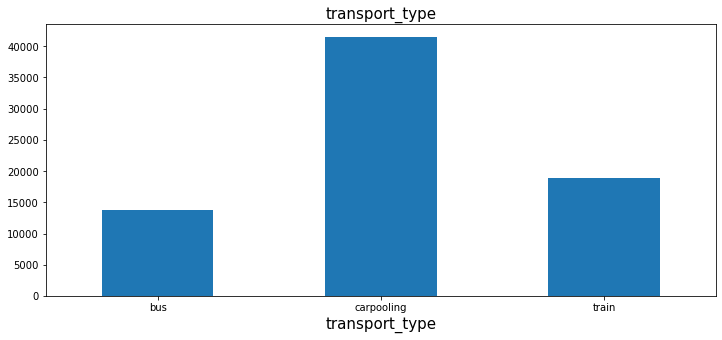

In [11]:
tickets.groupby('transport_type').size().plot(kind = 'bar',figsize=(12,5));
plt.title('transport_type',fontsize=15);
plt.xlabel('transport_type',fontsize=15);
plt.xticks(rotation=0);

In [12]:
#Price per travel
Price_info=tickets.groupby(['transport_type','o_city_name', 'd_city_name']).agg({'price_in_cents': ['count', 'min', 'max', 'mean']})


In [13]:
Price_info

price_in_cents                \
                                                          count    min    max   
transport_type o_city_name           d_city_name                                
bus            aeroport-paris-vatry- troyes                   1   5300   5300   
               agen                  marseille               19   2000   8920   
                                     paris                    4   2600   3190   
                                     toulouse                 2   2420   2420   
               aix-en-provence       angers                   2   5090   5290   
...                                                         ...    ...    ...   
train          vesoul                paris                   11   2700   6160   
               vierzon               bordeaux                 8   3450   6990   
                                     paris                   31   1400   6600   
               villefranche-sur-cher bordeaux                 9   3060   7610   
               vitre                 nice                     2  15070  21920   

                                                                
                                                          mean  
transport_type o_city_name           d_city_name                
bus            aeroport-paris-vatry- troyes        5300.000000  
               agen                  marseille     3104.210526  
                                     paris         2797.500000  
                                     toulouse      2420.000000  
               aix-en-provence       angers        5190.000000  
...                                                        ...  
train          vesoul                paris         4600.000000  
               vierzon               bordeaux      5612.500000  
                                     paris         3128.387097  
               villefranche-sur-cher bordeaux      5686.666667  
               vitre                 nice         18495.000000  

[2704 rows x 4 columns]

In [14]:
Price_info.loc['carpooling','paris','nice']

price_in_cents  count     131.000000
                min      3600.000000
                max      8500.000000
                mean     6819.083969
Name: (carpooling, paris, nice), dtype: float64

In [15]:
time_info=tickets.groupby(['transport_type','o_city_name', 'd_city_name'])['travel_duration'].describe()


In [16]:
time_info

count unique  \
transport_type o_city_name           d_city_name                
bus            aeroport-paris-vatry- troyes          1      1   
               agen                  marseille      19     10   
                                     paris           4      4   
                                     toulouse        2      1   
               aix-en-provence       angers          2      2   
...                                                ...    ...   
train          vesoul                paris          11     11   
               vierzon               bordeaux        8      8   
                                     paris          31     21   
               villefranche-sur-cher bordeaux        9      9   
               vitre                 nice            2      2   

                                                              top freq  
transport_type o_city_name           d_city_name                        
bus            aeroport-paris-vatry- troyes       0 days 21:55:00    1  
               agen                  marseille    0 days 09:00:00    2  
                                     paris        0 days 09:40:00    1  
                                     toulouse     0 days 04:11:00    2  
               aix-en-provence       angers       0 days 14:35:00    1  
...                                                           ...  ...  
train          vesoul                paris        0 days 03:28:00    1  
               vierzon               bordeaux     0 days 04:28:00    1  
                                     paris        0 days 04:44:00    3  
               villefranche-sur-cher bordeaux     0 days 03:10:00    1  
               vitre                 nice         0 days 11:05:00    1  

[2704 rows x 4 columns]

In [17]:
time_info.loc['carpooling','paris','nice']

count                 131
unique                 21
top       0 days 09:30:00
freq                   19
Name: (carpooling, paris, nice), dtype: object

différence de prix moyen et durée selon le train, le bus et le covoit selon la distance du trajet (0-200km, 201-800km, 800-2000km, 2000+km) 

In [18]:
diff_dis= tickets.groupby(['classe_distance', 'transport_type'])['travel_duration'].describe()
diff_dis

count unique              top  freq
classe_distance transport_type                                     
long            bus              1101    295  0 days 17:30:00    26
                carpooling        143     49  0 days 10:10:00    12
                train             323    207  0 days 08:06:00    12
medium          bus             11455    528  0 days 10:20:00   165
                carpooling      31255     83  0 days 02:30:00  1858
                train           16167   1461  0 days 03:47:00   204
short           bus              1242    308  0 days 06:30:00    29
                carpooling      10043     37  0 days 02:00:00  1339
                train            2439    487  0 days 02:31:00    62

In [19]:
diff_time= tickets.groupby(['classe_time', 'transport_type']).agg({'price_in_cents' : ['min', 'max', 'mean']})
diff_time

price_in_cents                     
                                      min    max          mean
classe_time transport_type                                    
long        bus                       850  12130   3830.282729
            carpooling               2150  11350   6873.446328
            train                     900  35100   8853.723958
medium      bus                       850  22480   3097.079900
            carpooling               1550   9450   5396.190121
            train                     730  37550  10412.116576
short       bus                       950  12380   2458.202349
            carpooling                700  13800   3317.481934
            train                    1070  38550   9263.145633
too_long    bus                       850  22900   4447.438960
            carpooling               4750  16150  10608.974359
            train                    1270  30350   8792.962522
too_short   bus                       990   6240   2082.783784
            carpooling                300  13450   1485.377409
            train                     490  24060   5157.092072

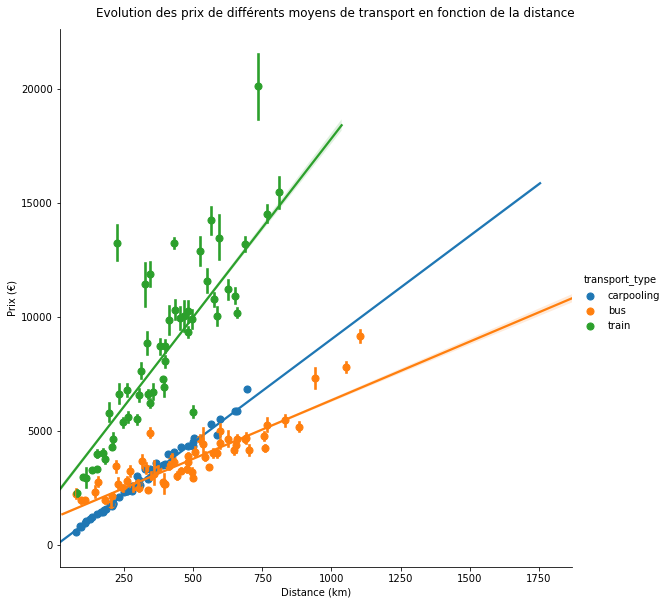

In [24]:
g = sns.lmplot(data=tickets, x='distance (km)', y='price_in_cents', hue='transport_type', markers='o', x_bins=70, height=8)
g.fig.suptitle('Evolution des prix de différents moyens de transport en fonction de la distance', x=0.5, y=1.02)
plt.xlabel('Distance (km)')
plt.ylabel('Prix (€)');

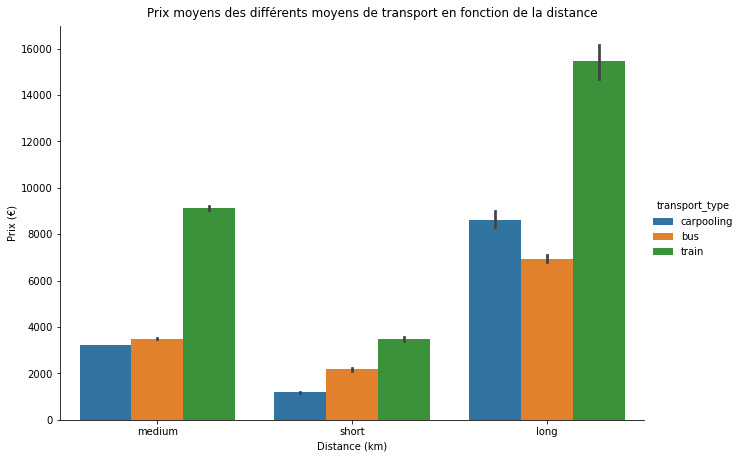

In [28]:
g = sns.catplot(x="classe_distance", y="price_in_cents", hue="transport_type", kind="bar", data=tickets, height=6, aspect=1.5)
g.fig.suptitle('Prix moyens des différents moyens de transport en fonction de la distance', x=0.5, y=1.02)
plt.xlabel('Distance (km)')
plt.ylabel('Prix (€)');

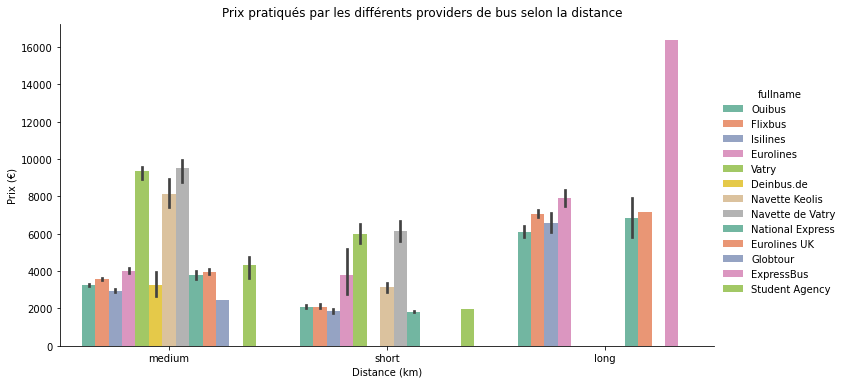

In [30]:
# Bus
g = sns.catplot(x="classe_distance", y="price_in_cents", hue="fullname", kind="bar", data=tickets[tickets.transport_type == 'bus'], palette="Set2", aspect=2)
g.fig.suptitle('Prix pratiqués par les différents providers de bus selon la distance', x=0.5, y=1.02)
plt.xlabel('Distance (km)')
plt.ylabel('Prix (€)');

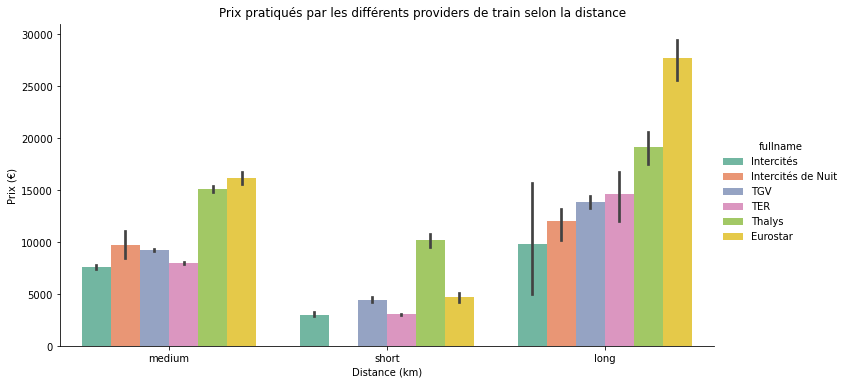

In [31]:
# Train
g = sns.catplot(x="classe_distance", y="price_in_cents", hue="fullname", kind="bar", data=tickets[tickets.transport_type == 'train'], palette="Set2", aspect=2)
g.fig.suptitle('Prix pratiqués par les différents providers de train selon la distance', x=0.5, y=1.02)
plt.xlabel('Distance (km)')
plt.ylabel('Prix (€)');

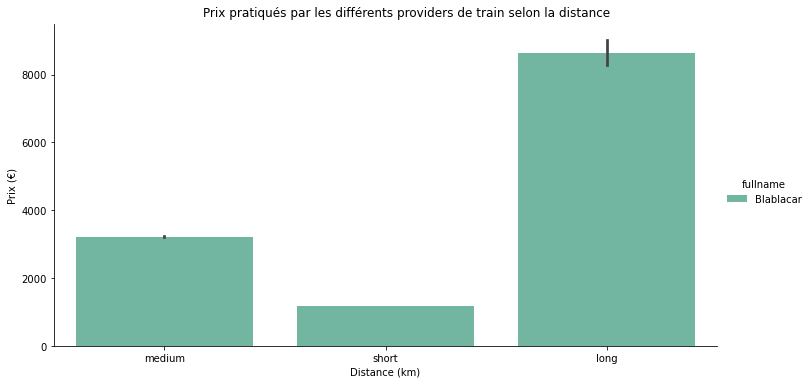

In [32]:
# Train
g = sns.catplot(x="classe_distance", y="price_in_cents", hue="fullname", kind="bar", data=tickets[tickets.transport_type == 'carpooling'], palette="Set2", aspect=2)
g.fig.suptitle('Prix pratiqués par les différents providers de train selon la distance', x=0.5, y=1.02)
plt.xlabel('Distance (km)')
plt.ylabel('Prix (€)');